<a href="https://colab.research.google.com/github/panghanwu/build_neural_network_python/blob/main/backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Backpropagation

---
## Principle

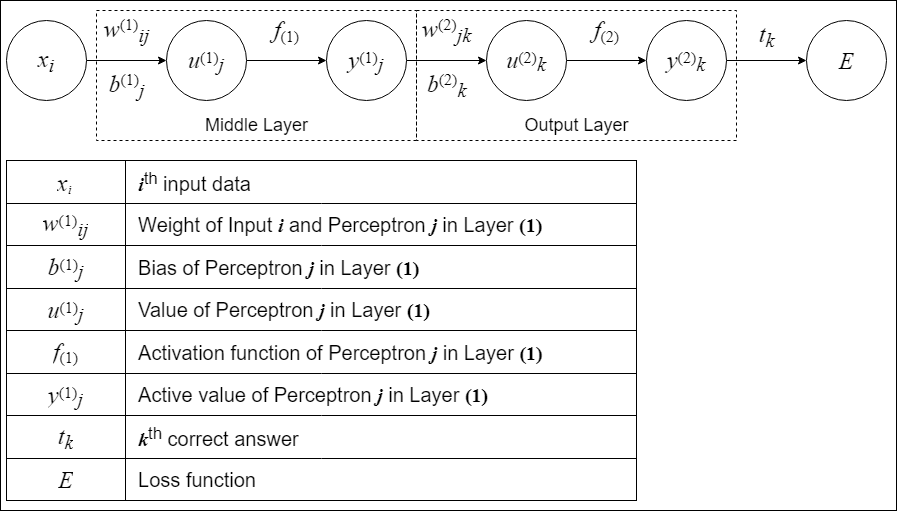


To update weight $w$ and bias $b$, we need $\dfrac{\partial E}{\partial w}$ and $\dfrac{\partial E}{\partial b}$.
     
$
\dfrac{\partial E}{\partial w^{(2)}_{jk}} 
= \dfrac{\partial E}{\partial y^{(2)}_{k}} 
\dfrac{\partial y^{(2)}_{k}}{\partial u^{(2)}_{k}} 
\dfrac{\partial u^{(2)}_{k}}{\partial w^{(2)}_{jk}}
= \delta^{(2)} y^{(1)}_{j}
$  

$
\dfrac{\partial E}{\partial b^{(2)}_{k}} 
= \dfrac{\partial E}{\partial y^{(2)}_{k}} 
\dfrac{\partial y^{(2)}_{k}}{\partial u^{(2)}_{k}} 
\dfrac{\partial u^{(2)}_{k}}{\partial b^{(2)}_{k}}
= \delta^{(2)}
$
  
$\delta^{(2)} = \dfrac{\partial E}{\partial u^{(2)}_{k}}$
  
$
\dfrac{\partial E}{\partial w^{(1)}_{ij}} 
= \dfrac{\partial E}{\partial y^{(2)}_{k}} 
\dfrac{\partial y^{(2)}_{k}}{\partial u^{(2)}_{k}} 
\dfrac{\partial u^{(2)}_{k}}{\partial y^{(1)}_{j}}
\dfrac{\partial y^{(1)}_{j}}{\partial u^{(1)}_{j}}
\dfrac{\partial u^{(1)}_{j}}{\partial w^{(1)}_{ij}}
= \delta^{(1)} x_{j}
$  
  
$
\dfrac{\partial E}{\partial b^{(1)}_{j}} 
= \dfrac{\partial E}{\partial y^{(2)}_{k}} 
\dfrac{\partial y^{(2)}_{k}}{\partial u^{(2)}_{k}} 
\dfrac{\partial u^{(2)}_{k}}{\partial y^{(1)}_{j}}
\dfrac{\partial y^{(1)}_{j}}{\partial u^{(1)}_{j}}
\dfrac{\partial u^{(1)}_{j}}{\partial b^{(1)}_{j}}
= \delta^{(1)}
$  
  
$
\dfrac{\partial E}{\partial y^{(2)}_{k}} 
\dfrac{\partial y^{(2)}_{k}}{\partial u^{(2)}_{k}} 
\dfrac{\partial u^{(2)}_{k}}{\partial y^{(1)}_{j}}
= \displaystyle\sum_{r=1}^{n} 
\dfrac{\partial E}{\partial u^{(2)}_{r}}
w_{jr}
$ 
  
$\delta^{(1)} = \dfrac{\partial E}{\partial u^{(1)}_{j}}$
  

---
## Example
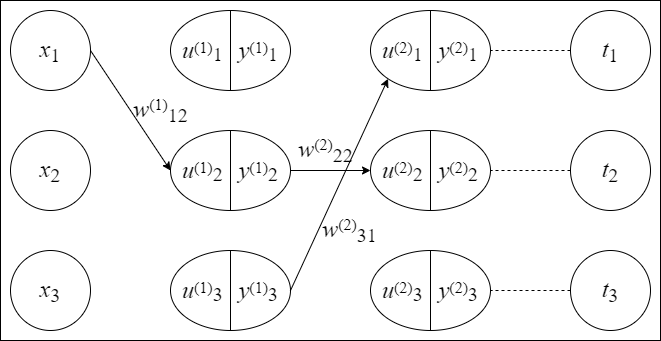

$
E = \dfrac{1}{2} [(y^{(1)}_{1}-t_{1})^2 + (y^{(2)}_{2}-t_{2})^2 + (y^{(3)}_{3}-t_{3})^2] 　　　(MSE)
$
  
$
\dfrac{\partial E}{\partial w^{(2)}_{22}} 
= \dfrac{\partial E}{\partial y^{(2)}_{2}} 
\dfrac{\partial y^{(2)}_{2}}{\partial u^{(2)}_{2}} 
\dfrac{\partial u^{(2)}_{2}}{\partial w^{(2)}_{22}}
= (y^{(2)}_{2}-t_{2}) f'_{(2)}(u^{(2)}_{2})\: y^{(1)}_{2}
$  
  
$
\dfrac{\partial E}{\partial w^{(2)}_{31}} 
= \dfrac{\partial E}{\partial y^{(2)}_{1}} 
\dfrac{\partial y^{(2)}_{1}}{\partial u^{(2)}_{1}} 
\dfrac{\partial u^{(2)}_{1}}{\partial w^{(2)}_{31}}
= (y^{(2)}_{1}-t_{1}) f'_{(2)}(u^{(2)}_{1})\: y^{(1)}_{3}
$
  
$
\begin{aligned}
\dfrac{\partial E}{\partial w^{(1)}_{12}} 
&= (\dfrac{\partial E}{\partial y^{(2)}_{1}} 
\dfrac{\partial y^{(2)}_{1}}{\partial u^{(2)}_{1}} 
\dfrac{\partial u^{(2)}_{1}}{\partial y^{(1)}_{2}}+
\dfrac{\partial E}{\partial y^{(2)}_{2}} 
\dfrac{\partial y^{(2)}_{2}}{\partial u^{(2)}_{2}} 
\dfrac{\partial u^{(2)}_{2}}{\partial y^{(1)}_{2}}+
\dfrac{\partial E}{\partial y^{(2)}_{3}} 
\dfrac{\partial y^{(2)}_{3}}{\partial u^{(2)}_{3}} 
\dfrac{\partial u^{(2)}_{3}}{\partial y^{(1)}_{2}}) \:
\dfrac{\partial y^{(1)}_{2}}{\partial u^{(1)}_{2}}
\dfrac{\partial u^{(1)}_{2}}{\partial w^{(1)}_{12}} \\
&= [(y^{(2)}_{1}-t_{1}) f'_{(2)}(u^{(2)}_{1})w^{(2)}_{21}+
(y^{(2)}_{2}-t_{2}) f'_{(2)}(u^{(2)}_{2})w^{(2)}_{22}+
(y^{(2)}_{3}-t_{3}) f'_{(2)}(u^{(2)}_{3})w^{(2)}_{23}]
f'_{(1)}(u^{(1)}_{2})\: x_{1}
\end{aligned}
$

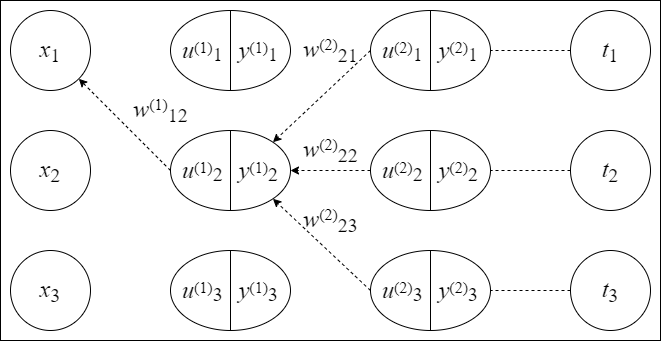


---
## Matrix and Code
Batch size =　3 
   
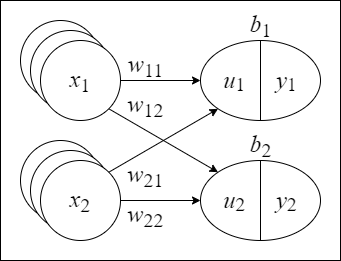

### Forward Propagation

$
\mathbf{U} = 
\begin{bmatrix}
x^{1}_{1} & x^{1}_{2}\\
x^{2}_{1} & x^{2}_{2}\\
x^{3}_{1} & x^{3}_{2}
\end{bmatrix}
\begin{bmatrix}
w_{11} & w_{12}\\
w_{21} & w_{22}
\end{bmatrix}
 +
\begin{bmatrix}
b_{1} & b_{2}\\
b_{1} & b_{2}\\
b_{1} & b_{2}
\end{bmatrix}
 = 
\begin{bmatrix}
u^{1}_{1} & u^{1}_{2}\\
u^{2}_{1} & u^{2}_{2}\\
u^{3}_{1} & u^{3}_{2}
\end{bmatrix}
$

In [ ]:
import numpy as np

x = np.array([[1.0,2.0], 
        [3.0,4.0],
        [5.0,6.0]])

w = np.array([[1.0,1.0], 
        [1.0,1.0]])

b = np.array([1.0,1.0])

# forward propagation
u = np.dot(x, w) + b
u

array([[ 4.,  4.],
       [ 8.,  8.],
       [12., 12.]])

### Backpropagation

$
\begin{aligned}
\dfrac{\partial E}{\partial \mathbf{W}} 
& = 
\begin{bmatrix}
\dfrac{\partial E}{\partial w_{11}} & \dfrac{\partial E}{\partial w_{12}}\\
\dfrac{\partial E}{\partial w_{21}} & \dfrac{\partial E}{\partial w_{22}}
\end{bmatrix} 
= 
\begin{bmatrix}
\dfrac{\partial E}{\partial y_{1}} 
\dfrac{\partial y_{1}} {\partial u_{1}}
\dfrac{\partial u_{1}} {\partial w_{11}}
& \dfrac{\partial E}{\partial y_{2}} 
\dfrac{\partial y_{2}} {\partial u_{2}}
\dfrac{\partial u_{2}} {\partial w_{12}}\\
\dfrac{\partial E}{\partial y_{1}} 
\dfrac{\partial y_{1}} {\partial u_{1}}
\dfrac{\partial u_{1}} {\partial w_{21}}
& \dfrac{\partial E}{\partial y_{2}} 
\dfrac{\partial y_{2}} {\partial u_{2}}
\dfrac{\partial u_{2}} {\partial w_{22}}
\end{bmatrix} 
=
\begin{bmatrix}
\delta_{1} x_{1} & \delta_{2} x_{1}\\
\delta_{1} x_{2} & \delta_{2} x_{2}
\end{bmatrix} \\
& =
\mathbf{X}^{T} \mathbf{\Delta} 
= 
\begin{bmatrix}
x^{1}_{1} & x^{2}_{1} & x^{3}_{1}\\
x^{1}_{2} & x^{2}_{2} & x^{3}_{2}
\end{bmatrix}
\begin{bmatrix}
\delta^{1}_{1} & \delta^{1}_{2}\\
\delta^{2}_{1} & \delta^{2}_{2}\\
\delta^{3}_{1} & \delta^{3}_{2}
\end{bmatrix} 
= 
\begin{bmatrix}
x^{1}_{1} \delta^{1}_{1} + x^{2}_{1} \delta^{2}_{1} + x^{3}_{1} \delta^{3}_{1}
& x^{1}_{1} \delta^{1}_{2} + x^{2}_{1} \delta^{2}_{2} + x^{3}_{1} \delta^{3}_{2}\\ x^{1}_{2} \delta^{1}_{1} + x^{2}_{2} \delta^{2}_{1} + x^{3}_{2} \delta^{3}_{1}
& x^{1}_{2} \delta^{1}_{2} + x^{2}_{2} \delta^{2}_{2} + x^{3}_{2} \delta^{3}_{2}
\end{bmatrix}
\end{aligned}
$

In [ ]:
delta = np.array([[1.0,1.0], 
          [1.0,1.0],
          [1.0,1.0]])
grad_w = np.dot(x.T, delta)
grad_w

array([[ 9.,  9.],
       [12., 12.]])

$
\dfrac{\partial E}{\partial \mathbf{b}} 
= 
\begin{bmatrix}
\delta^{1}_{1} + \delta^{2}_{1} + \delta^{3}_{1}
& \delta^{1}_{2} + \delta^{2}_{2} + \delta^{3}_{2}
\end{bmatrix}
$


In [ ]:
grad_b = np.sum(delta, axis=0)
grad_b

array([3., 3.])

$
\dfrac{\partial E}{\partial \mathbf{Y}^{(1)}} 
=
\mathbf{\Delta}^{(2)} \mathbf{W}^{(2){T}} 
= 
\begin{bmatrix}
\delta^{1}_{1} & \delta^{1}_{2}\\
\delta^{2}_{1} & \delta^{2}_{2}\\
\delta^{3}_{1} & \delta^{3}_{2}
\end{bmatrix} 
\begin{bmatrix}
w_{11} & w_{21}\\
w_{12} & w_{22}
\end{bmatrix}
= 
\begin{bmatrix}
\delta^{1}_{1} w_{11} + \delta^{1}_{2} w_{12} & 
\delta^{1}_{1} w_{21} + \delta^{1}_{2} w_{22} 
\\
\delta^{2}_{1} w_{11} + \delta^{2}_{2} w_{12} & 
\delta^{2}_{1} w_{21} + \delta^{2}_{2} w_{22}
\\
\delta^{3}_{1} w_{11} + \delta^{3}_{2} w_{12} & 
\delta^{3}_{1} w_{21} + \delta^{3}_{2} w_{22}
\end{bmatrix} 
$

In [ ]:
delta2 = np.array([[2.0,1.0], 
           [2.0,1.0],
           [2.0,1.0]])
w2 = np.array([[1.0,1.0], 
         [1.0,1.0]])

grad_y1 = np.dot(delta2, w2.T)
grad_y1

array([[3., 3.],
       [3., 3.],
       [3., 3.]])